In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import loan data

In [5]:
loan_data = pd.read_csv(r"datasets/train_loans_data.csv")
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Create Gender Filtered Data

In [12]:
gender_filtered_df = loan_data[loan_data['Loan_Status']=="Y"]
gender_filtered_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [48]:
gender_summary = gender_filtered_df[['Gender','Loan_Status']].groupby(['Gender']).agg(['count'])
gender_summary

,Loan_Status
,count
Gender,
Female,75
Male,339


In [55]:
xAxis = gender_summary.index.values
yAxis = gender_summary['Loan_Status'].squeeze()

# Build Gender Graph

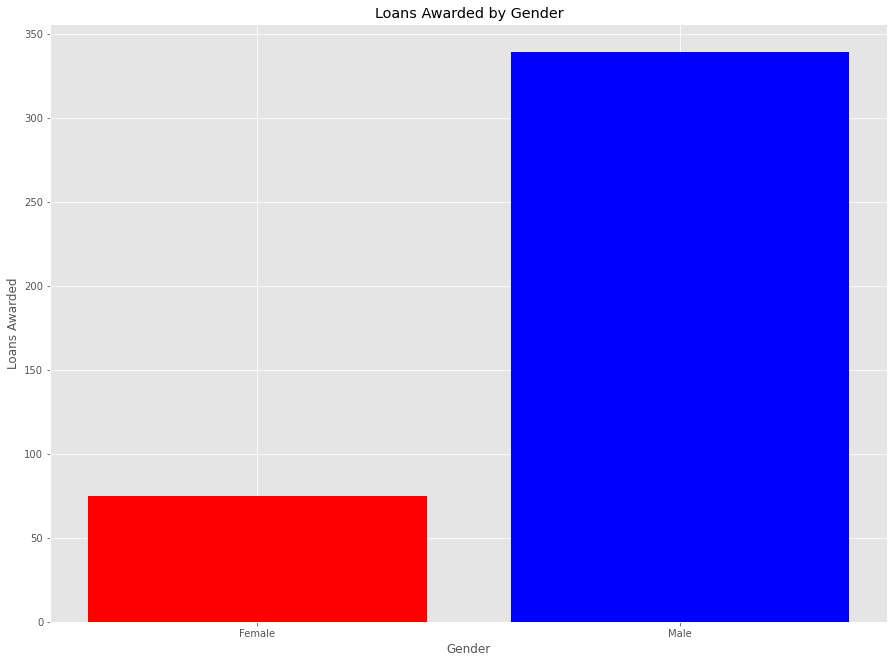

In [142]:
plt.style.use('ggplot')

x_pos = [i for i, _ in enumerate(xAxis)]

plt.rcParams["figure.figsize"] = (15, 11)

plt.bar(x_pos, yAxis, color=['red', 'blue'])
plt.xlabel("Gender")
plt.ylabel("Loans Awarded")
plt.title("Loans Awarded by Gender")

plt.xticks(x_pos, xAxis)

plt.savefig('loans_awarded_byGender.png')

plt.show()

# Create Loan Amount Binning

In [104]:
# Create clean dataframe w/o NaNs
loan_data_clean = loan_data[loan_data['LoanAmount'].notna()]

# Create dataframe filtered by graduates
Loan_Amount_graduated = loan_data_clean[loan_data_clean['Education']=="Graduate"]

# Create dataframe filtered by non-Graduates
Loan_Amount_notGraduated = loan_data_clean[loan_data_clean['Education']=="Not Graduate"]

In [105]:
# Create Loan Amount bins
loan_amt_bins = [0,50,100,150,200,300,500,700]
labels = ['0-50','50-100','100-150','150-200','200-300','300-500','500-700']

In [112]:
# Loan Amounts if Graduated
Loan_Amount_graduated['LoanAmountRange'] = pd.cut(Loan_Amount_graduated['LoanAmount'],
                                bins=loan_amt_bins,labels=labels)
LAG_condensed = Loan_Amount_graduated[['Married','Gender','ApplicantIncome','LoanAmount','LoanAmountRange']]

LAG_condensed

<ipython-input-112-11f9579da830>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_Amount_graduated['LoanAmountRange'] = pd.cut(Loan_Amount_graduated['LoanAmount'],


,Married,Gender,ApplicantIncome,LoanAmount,LoanAmountRange
1,Yes,Male,4583,128.0,100-150
2,Yes,Male,3000,66.0,50-100
4,No,Male,6000,141.0,100-150
5,Yes,Male,5417,267.0,200-300
7,Yes,Male,3036,158.0,150-200
...,...,...,...,...,...
609,No,Female,2900,71.0,50-100
610,Yes,Male,4106,40.0,0-50
611,Yes,Male,8072,253.0,200-300
612,Yes,Male,7583,187.0,150-200


In [113]:
#Loan Amounts if Not Graduated
Loan_Amount_notGraduated['LoanAmountRange'] = pd.cut(Loan_Amount_notGraduated['LoanAmount'],
                                bins=loan_amt_bins,labels=labels)
LANG_condensed = Loan_Amount_notGraduated[['Married','Gender','ApplicantIncome','LoanAmount','LoanAmountRange']]

LANG_condensed

<ipython-input-113-72a77de6e15c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_Amount_notGraduated['LoanAmountRange'] = pd.cut(Loan_Amount_notGraduated['LoanAmount'],


,Married,Gender,ApplicantIncome,LoanAmount,LoanAmountRange
3,Yes,Male,2583,120.0,100-150
6,Yes,Male,2333,95.0,50-100
16,No,Male,3596,100.0,50-100
18,Yes,Male,4887,133.0,100-150
20,Yes,Male,7660,104.0,100-150
...,...,...,...,...,...
587,No,Female,2165,70.0,50-100
595,No,Male,3833,110.0,100-150
596,Yes,Male,6383,187.0,150-200
601,Yes,Male,2894,155.0,150-200


In [119]:
LANG_final = LANG_condensed.groupby(['LoanAmountRange']).agg(['count'])
LAG_final = LAG_condensed.groupby(['LoanAmountRange']).agg(['count'])

# Create Dual Line Graph

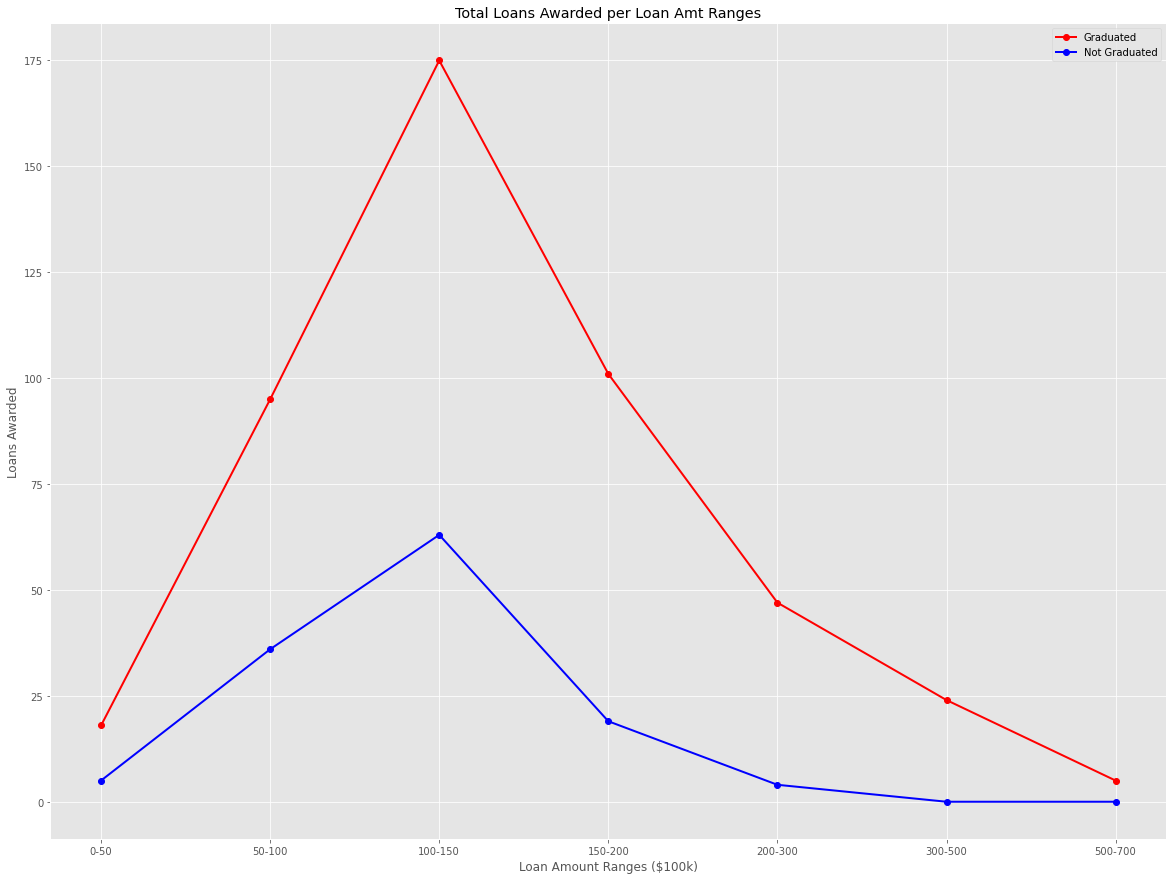

In [144]:
# Data
graphed_data = pd.DataFrame({'x_values': LAG_final.index.values, 'Graduated': LAG_final['LoanAmount'].squeeze(),
                 'Not Graduated': LANG_final['LoanAmount'].squeeze()})

plt.rcParams["figure.figsize"] = (20, 15)

# multiple line plots
plt.plot( 'x_values', 'Graduated', data=graphed_data, marker='o', markerfacecolor='red', markersize=6, color='red', linewidth=2)
plt.plot( 'x_values', 'Not Graduated', data=graphed_data, marker='o', markerfacecolor='blue', markersize=6, color='blue', linewidth=2)
# show legend
plt.legend()

# create axis and chart labels
plt.xlabel("Loan Amount Ranges ($100k)")
plt.ylabel("Loans Awarded")
plt.title("Total Loans Awarded per Loan Amt Ranges")

plt.savefig('loans_awarded_byLoanAmount.png')

# show graph
plt.show()
